# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [2]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

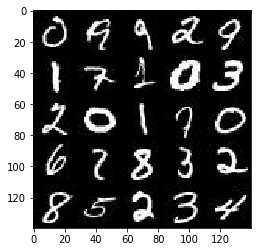

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

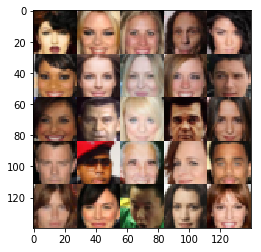

In [4]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [6]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_real = tf.placeholder(tf.float32,(None,image_height,image_width,image_channels),name="input_real")
    input_z = tf.placeholder(tf.float32,(None,z_dim),name="input_z")
    learning_rate_pl =tf.placeholder(tf.float32,name="learning_rate")
    return input_real, input_z, learning_rate_pl


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [7]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha = 0.20
    with tf.variable_scope('discriminator',reuse=reuse):
        x1 = tf.layers.conv2d(images,64,5,strides=2,padding='same')
        relu1 = tf.maximum(alpha*x1,x1)
        
        x2 = tf.layers.conv2d(relu1,128,5,strides=2,padding='same')
        bn2 = tf.layers.batch_normalization(x2,training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        
        x3 = tf.layers.conv2d(relu2,256,5,strides=2,padding='same')
        bn3 = tf.layers.batch_normalization(x3,training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        
        flattened = tf.reshape(relu3, (-1,4*4*256))
        
        logits= tf.layers.dense(flattened,1)
        out= tf.sigmoid(logits)
    
        return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [8]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    reuse_state = not is_train
    alpha = 0.10
    with tf.variable_scope('generator',reuse=reuse_state): 
        x1 = tf.layers.dense(z, 4*4*512)
        x1 = tf.reshape(x1,(-1,4,4,512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        
        
        x2 = tf.layers.conv2d_transpose(x1, 256 , 4,strides = 1, padding= 'valid' )
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides= 2, padding= 'same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides= 2, padding= 'same')    
        out = tf.tanh(logits)
        
        return out



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [9]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    gen_model = generator(input_z,out_channel_dim,is_train=True)
    d_model_real,d_logits_real =discriminator(input_real,reuse=False)
    d_model_fake,d_logits_fake =discriminator(gen_model,reuse=True)
    
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)*0.9))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [10]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    train_vars = tf.trainable_variables()
    d_vars = [var for var in train_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in train_vars if var.name.startswith('generator')]
    
   
   
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        g_opt_train = tf.train.AdamOptimizer(learning_rate=learning_rate,beta1=beta1).minimize(g_loss, var_list= g_vars)
        d_opt_train = tf.train.AdamOptimizer(learning_rate=learning_rate,beta1=beta1).minimize(d_loss, var_list= d_vars)
    
        return d_opt_train, g_opt_train


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [11]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [12]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    losses = []
    steps = 0
    _,image_width,image_height,image_channels = data_shape
    input_real, input_z , learning_rate_pl = model_inputs(image_width,image_height,image_channels,z_dim)
    
    d_loss, g_loss = model_loss(input_real, input_z, image_channels)
    d_opt, g_opt = model_opt(d_loss, g_loss,learning_rate_pl, beta1)
    n_images = 25
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count): 
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                
                #sample random noise for G
                batch_z = np.random.uniform(-1,1,size=(batch_size,z_dim))
                batch_images = batch_images * 2.0
                
                sess.run(d_opt,feed_dict={input_real:batch_images,input_z:batch_z,learning_rate_pl:learning_rate})
                sess.run(g_opt,feed_dict={input_real:batch_images,input_z:batch_z,learning_rate_pl:learning_rate})
                sess.run(g_opt,feed_dict={input_real:batch_images,input_z:batch_z,learning_rate_pl:learning_rate})
                
                
                
                if steps % 10 == 0 :
                    train_loss_d = d_loss.eval({input_real:batch_images,input_z:batch_z,learning_rate_pl:learning_rate})
                    train_loss_g = g_loss.eval({input_real:batch_images,input_z:batch_z,learning_rate_pl:learning_rate})
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                      "Discriminator Loss: {:.4f}...".format(train_loss_d),
                      "Generator Loss: {:.4f}".format(train_loss_g))
                
                    losses.append((train_loss_d, train_loss_g))
                    
                if steps % 100 == 0:
                    show_generator_output(sess,n_images,input_z,image_channels,data_image_mode)

                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 3.4890... Generator Loss: 0.0565
Epoch 1/2... Discriminator Loss: 3.5853... Generator Loss: 0.0517
Epoch 1/2... Discriminator Loss: 3.1746... Generator Loss: 0.0822
Epoch 1/2... Discriminator Loss: 3.1812... Generator Loss: 0.0757
Epoch 1/2... Discriminator Loss: 2.4804... Generator Loss: 0.2985
Epoch 1/2... Discriminator Loss: 1.9447... Generator Loss: 0.4239
Epoch 1/2... Discriminator Loss: 1.6936... Generator Loss: 0.6831
Epoch 1/2... Discriminator Loss: 1.7100... Generator Loss: 1.0101
Epoch 1/2... Discriminator Loss: 1.6223... Generator Loss: 0.6419
Epoch 1/2... Discriminator Loss: 1.8921... Generator Loss: 0.3519


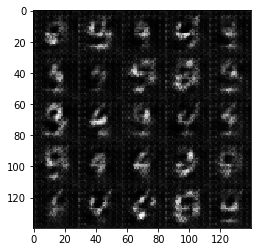

Epoch 1/2... Discriminator Loss: 1.7856... Generator Loss: 0.3671
Epoch 1/2... Discriminator Loss: 1.6822... Generator Loss: 0.5244
Epoch 1/2... Discriminator Loss: 1.5838... Generator Loss: 0.5832
Epoch 1/2... Discriminator Loss: 1.8334... Generator Loss: 0.3102
Epoch 1/2... Discriminator Loss: 1.5901... Generator Loss: 0.4358
Epoch 1/2... Discriminator Loss: 1.7157... Generator Loss: 0.3711
Epoch 1/2... Discriminator Loss: 1.6204... Generator Loss: 0.4190
Epoch 1/2... Discriminator Loss: 1.5735... Generator Loss: 0.4561
Epoch 1/2... Discriminator Loss: 1.5799... Generator Loss: 0.4563
Epoch 1/2... Discriminator Loss: 1.6695... Generator Loss: 0.3817


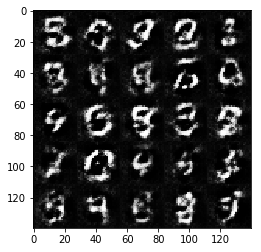

Epoch 1/2... Discriminator Loss: 1.5118... Generator Loss: 0.4886
Epoch 1/2... Discriminator Loss: 1.6961... Generator Loss: 0.3557
Epoch 1/2... Discriminator Loss: 1.6155... Generator Loss: 0.4359
Epoch 1/2... Discriminator Loss: 1.5241... Generator Loss: 0.4845
Epoch 1/2... Discriminator Loss: 1.5580... Generator Loss: 0.4354
Epoch 1/2... Discriminator Loss: 1.6293... Generator Loss: 0.4138
Epoch 1/2... Discriminator Loss: 1.5449... Generator Loss: 0.4614
Epoch 1/2... Discriminator Loss: 1.6295... Generator Loss: 0.4136
Epoch 1/2... Discriminator Loss: 1.5636... Generator Loss: 0.4329
Epoch 1/2... Discriminator Loss: 1.5462... Generator Loss: 0.4719


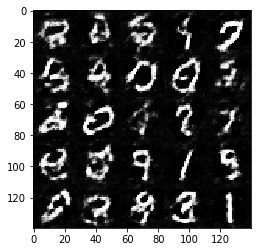

Epoch 1/2... Discriminator Loss: 1.5114... Generator Loss: 0.4992
Epoch 1/2... Discriminator Loss: 1.5550... Generator Loss: 0.4356
Epoch 1/2... Discriminator Loss: 1.5927... Generator Loss: 0.4367
Epoch 1/2... Discriminator Loss: 1.6767... Generator Loss: 0.3558
Epoch 1/2... Discriminator Loss: 1.4932... Generator Loss: 0.5013
Epoch 1/2... Discriminator Loss: 1.5361... Generator Loss: 0.4550
Epoch 1/2... Discriminator Loss: 1.6423... Generator Loss: 0.3850
Epoch 1/2... Discriminator Loss: 1.4697... Generator Loss: 0.5704
Epoch 1/2... Discriminator Loss: 1.5239... Generator Loss: 0.5039
Epoch 1/2... Discriminator Loss: 1.6598... Generator Loss: 0.3918


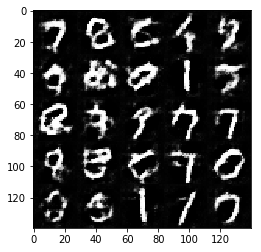

Epoch 1/2... Discriminator Loss: 1.5042... Generator Loss: 0.4801
Epoch 1/2... Discriminator Loss: 1.6629... Generator Loss: 0.3739
Epoch 1/2... Discriminator Loss: 1.4489... Generator Loss: 0.5996
Epoch 1/2... Discriminator Loss: 1.5839... Generator Loss: 0.4375
Epoch 1/2... Discriminator Loss: 1.6559... Generator Loss: 0.3991
Epoch 1/2... Discriminator Loss: 1.4685... Generator Loss: 0.5760
Epoch 1/2... Discriminator Loss: 1.5897... Generator Loss: 0.4016
Epoch 1/2... Discriminator Loss: 1.5278... Generator Loss: 0.4591
Epoch 1/2... Discriminator Loss: 1.4713... Generator Loss: 0.5311
Epoch 1/2... Discriminator Loss: 1.4339... Generator Loss: 0.8881


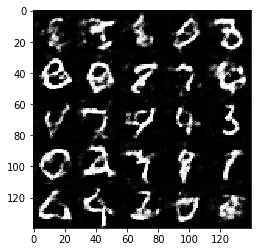

Epoch 1/2... Discriminator Loss: 1.5137... Generator Loss: 0.9105
Epoch 1/2... Discriminator Loss: 1.4084... Generator Loss: 0.8588
Epoch 1/2... Discriminator Loss: 1.5060... Generator Loss: 0.5296
Epoch 1/2... Discriminator Loss: 1.5793... Generator Loss: 0.4398
Epoch 1/2... Discriminator Loss: 1.4915... Generator Loss: 0.5367
Epoch 1/2... Discriminator Loss: 1.5694... Generator Loss: 0.4300
Epoch 1/2... Discriminator Loss: 1.4347... Generator Loss: 0.5729
Epoch 1/2... Discriminator Loss: 1.4672... Generator Loss: 0.5372
Epoch 1/2... Discriminator Loss: 1.5867... Generator Loss: 0.4309
Epoch 1/2... Discriminator Loss: 1.4948... Generator Loss: 0.4663


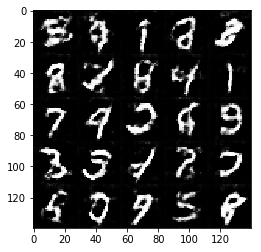

Epoch 1/2... Discriminator Loss: 1.5528... Generator Loss: 0.4362
Epoch 1/2... Discriminator Loss: 1.5650... Generator Loss: 0.4435
Epoch 1/2... Discriminator Loss: 1.3952... Generator Loss: 0.6489
Epoch 1/2... Discriminator Loss: 1.5306... Generator Loss: 0.4841
Epoch 1/2... Discriminator Loss: 1.6829... Generator Loss: 0.3583
Epoch 1/2... Discriminator Loss: 1.4224... Generator Loss: 0.6159
Epoch 1/2... Discriminator Loss: 1.6505... Generator Loss: 0.3740
Epoch 1/2... Discriminator Loss: 1.5229... Generator Loss: 0.5305
Epoch 1/2... Discriminator Loss: 1.5033... Generator Loss: 0.4783
Epoch 1/2... Discriminator Loss: 1.4760... Generator Loss: 0.4893


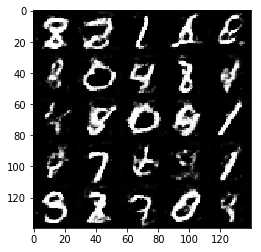

Epoch 1/2... Discriminator Loss: 1.5142... Generator Loss: 0.4654
Epoch 1/2... Discriminator Loss: 1.5190... Generator Loss: 0.4625
Epoch 1/2... Discriminator Loss: 1.4744... Generator Loss: 0.5391
Epoch 1/2... Discriminator Loss: 1.5627... Generator Loss: 0.4377
Epoch 1/2... Discriminator Loss: 1.5982... Generator Loss: 0.3975
Epoch 1/2... Discriminator Loss: 1.4601... Generator Loss: 0.6298
Epoch 1/2... Discriminator Loss: 1.4264... Generator Loss: 1.1477
Epoch 1/2... Discriminator Loss: 1.4025... Generator Loss: 0.8525
Epoch 1/2... Discriminator Loss: 1.4208... Generator Loss: 0.7667
Epoch 1/2... Discriminator Loss: 1.4083... Generator Loss: 0.8408


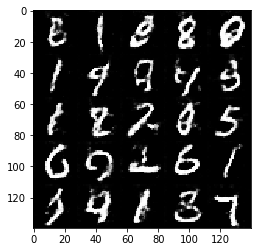

Epoch 1/2... Discriminator Loss: 1.7074... Generator Loss: 1.1945
Epoch 1/2... Discriminator Loss: 1.3621... Generator Loss: 0.8303
Epoch 1/2... Discriminator Loss: 1.3645... Generator Loss: 0.7648
Epoch 1/2... Discriminator Loss: 1.4163... Generator Loss: 0.7890
Epoch 1/2... Discriminator Loss: 1.3619... Generator Loss: 0.8439
Epoch 1/2... Discriminator Loss: 1.3791... Generator Loss: 0.6907
Epoch 1/2... Discriminator Loss: 2.0382... Generator Loss: 0.2133
Epoch 1/2... Discriminator Loss: 1.3900... Generator Loss: 0.6632
Epoch 1/2... Discriminator Loss: 1.4237... Generator Loss: 0.6029
Epoch 1/2... Discriminator Loss: 1.4482... Generator Loss: 0.6558


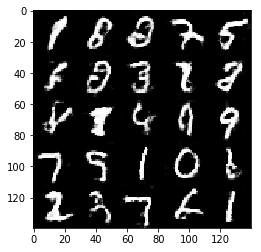

Epoch 1/2... Discriminator Loss: 1.7000... Generator Loss: 1.2827
Epoch 1/2... Discriminator Loss: 1.5379... Generator Loss: 0.4246
Epoch 1/2... Discriminator Loss: 1.5793... Generator Loss: 0.4261
Epoch 2/2... Discriminator Loss: 1.3556... Generator Loss: 0.7681
Epoch 2/2... Discriminator Loss: 1.5364... Generator Loss: 0.7587
Epoch 2/2... Discriminator Loss: 1.4801... Generator Loss: 1.0171
Epoch 2/2... Discriminator Loss: 1.3948... Generator Loss: 0.6559
Epoch 2/2... Discriminator Loss: 1.3994... Generator Loss: 0.7665
Epoch 2/2... Discriminator Loss: 1.4890... Generator Loss: 0.6853
Epoch 2/2... Discriminator Loss: 1.3826... Generator Loss: 0.6302


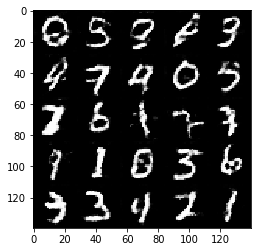

Epoch 2/2... Discriminator Loss: 1.3172... Generator Loss: 0.7949
Epoch 2/2... Discriminator Loss: 1.7197... Generator Loss: 1.2971
Epoch 2/2... Discriminator Loss: 1.3859... Generator Loss: 0.6485
Epoch 2/2... Discriminator Loss: 1.5179... Generator Loss: 0.4421
Epoch 2/2... Discriminator Loss: 1.4957... Generator Loss: 0.4420
Epoch 2/2... Discriminator Loss: 1.4819... Generator Loss: 0.5166
Epoch 2/2... Discriminator Loss: 1.5104... Generator Loss: 0.4844
Epoch 2/2... Discriminator Loss: 1.4576... Generator Loss: 0.5056
Epoch 2/2... Discriminator Loss: 1.5995... Generator Loss: 0.3820
Epoch 2/2... Discriminator Loss: 1.4172... Generator Loss: 0.6089


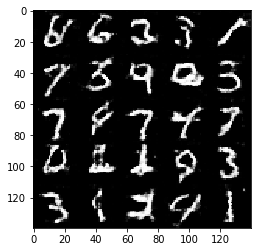

Epoch 2/2... Discriminator Loss: 1.3394... Generator Loss: 1.0272
Epoch 2/2... Discriminator Loss: 1.4993... Generator Loss: 0.7288
Epoch 2/2... Discriminator Loss: 1.4104... Generator Loss: 0.5745
Epoch 2/2... Discriminator Loss: 1.7956... Generator Loss: 0.2965
Epoch 2/2... Discriminator Loss: 1.4404... Generator Loss: 0.4931
Epoch 2/2... Discriminator Loss: 1.4052... Generator Loss: 0.5363
Epoch 2/2... Discriminator Loss: 1.3631... Generator Loss: 0.5881
Epoch 2/2... Discriminator Loss: 1.6027... Generator Loss: 0.3879
Epoch 2/2... Discriminator Loss: 1.5476... Generator Loss: 0.4408
Epoch 2/2... Discriminator Loss: 1.4706... Generator Loss: 0.5811


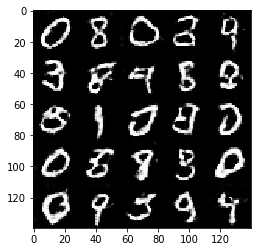

Epoch 2/2... Discriminator Loss: 1.4948... Generator Loss: 1.0210
Epoch 2/2... Discriminator Loss: 1.3866... Generator Loss: 0.5338
Epoch 2/2... Discriminator Loss: 1.6552... Generator Loss: 0.3708
Epoch 2/2... Discriminator Loss: 1.7419... Generator Loss: 0.3182
Epoch 2/2... Discriminator Loss: 1.4966... Generator Loss: 0.4589
Epoch 2/2... Discriminator Loss: 1.6955... Generator Loss: 0.3402
Epoch 2/2... Discriminator Loss: 1.4938... Generator Loss: 0.9661
Epoch 2/2... Discriminator Loss: 1.3193... Generator Loss: 0.6603
Epoch 2/2... Discriminator Loss: 1.3518... Generator Loss: 0.7544
Epoch 2/2... Discriminator Loss: 1.3161... Generator Loss: 0.9717


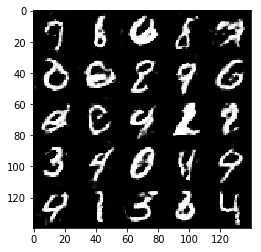

Epoch 2/2... Discriminator Loss: 1.3352... Generator Loss: 0.9817
Epoch 2/2... Discriminator Loss: 1.4082... Generator Loss: 1.0186
Epoch 2/2... Discriminator Loss: 1.4731... Generator Loss: 0.7563
Epoch 2/2... Discriminator Loss: 1.3746... Generator Loss: 0.7286
Epoch 2/2... Discriminator Loss: 2.2778... Generator Loss: 1.5442
Epoch 2/2... Discriminator Loss: 1.4041... Generator Loss: 0.7573
Epoch 2/2... Discriminator Loss: 1.4313... Generator Loss: 0.5799
Epoch 2/2... Discriminator Loss: 1.3596... Generator Loss: 0.7551
Epoch 2/2... Discriminator Loss: 1.6926... Generator Loss: 1.4716
Epoch 2/2... Discriminator Loss: 1.4009... Generator Loss: 0.5593


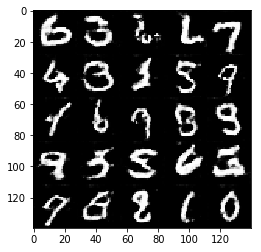

Epoch 2/2... Discriminator Loss: 1.2910... Generator Loss: 0.7618
Epoch 2/2... Discriminator Loss: 1.5922... Generator Loss: 1.5178
Epoch 2/2... Discriminator Loss: 1.3598... Generator Loss: 0.8662
Epoch 2/2... Discriminator Loss: 1.8115... Generator Loss: 1.2267
Epoch 2/2... Discriminator Loss: 1.4115... Generator Loss: 0.5957
Epoch 2/2... Discriminator Loss: 1.2997... Generator Loss: 0.9249
Epoch 2/2... Discriminator Loss: 1.3320... Generator Loss: 0.9437
Epoch 2/2... Discriminator Loss: 1.3172... Generator Loss: 0.8696
Epoch 2/2... Discriminator Loss: 1.4773... Generator Loss: 1.0785
Epoch 2/2... Discriminator Loss: 1.5504... Generator Loss: 0.7937


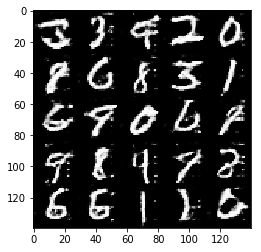

Epoch 2/2... Discriminator Loss: 1.4446... Generator Loss: 0.5691
Epoch 2/2... Discriminator Loss: 1.7510... Generator Loss: 0.3034
Epoch 2/2... Discriminator Loss: 1.6189... Generator Loss: 0.3863
Epoch 2/2... Discriminator Loss: 1.3558... Generator Loss: 0.7637
Epoch 2/2... Discriminator Loss: 1.6916... Generator Loss: 0.3245
Epoch 2/2... Discriminator Loss: 1.5235... Generator Loss: 0.4162
Epoch 2/2... Discriminator Loss: 1.3378... Generator Loss: 0.5960
Epoch 2/2... Discriminator Loss: 1.3764... Generator Loss: 0.5518
Epoch 2/2... Discriminator Loss: 1.4047... Generator Loss: 0.5367
Epoch 2/2... Discriminator Loss: 2.0248... Generator Loss: 0.2224


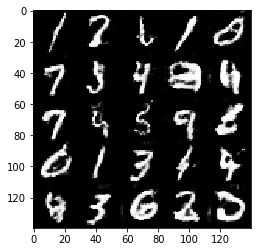

Epoch 2/2... Discriminator Loss: 1.4089... Generator Loss: 0.4935
Epoch 2/2... Discriminator Loss: 1.3266... Generator Loss: 0.7459
Epoch 2/2... Discriminator Loss: 1.3278... Generator Loss: 1.2955
Epoch 2/2... Discriminator Loss: 1.3383... Generator Loss: 0.6996
Epoch 2/2... Discriminator Loss: 1.3967... Generator Loss: 1.4353
Epoch 2/2... Discriminator Loss: 1.3478... Generator Loss: 0.5865
Epoch 2/2... Discriminator Loss: 3.0159... Generator Loss: 2.3585
Epoch 2/2... Discriminator Loss: 1.3162... Generator Loss: 0.8397
Epoch 2/2... Discriminator Loss: 1.3241... Generator Loss: 0.7201
Epoch 2/2... Discriminator Loss: 1.6036... Generator Loss: 1.3292


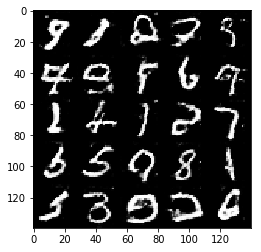

Epoch 2/2... Discriminator Loss: 1.3094... Generator Loss: 0.6905
Epoch 2/2... Discriminator Loss: 1.9096... Generator Loss: 1.5495
Epoch 2/2... Discriminator Loss: 1.4310... Generator Loss: 0.5546
Epoch 2/2... Discriminator Loss: 1.3691... Generator Loss: 0.6776
Epoch 2/2... Discriminator Loss: 1.3996... Generator Loss: 1.2101
Epoch 2/2... Discriminator Loss: 1.6221... Generator Loss: 0.3867
Epoch 2/2... Discriminator Loss: 1.8636... Generator Loss: 0.2651
Epoch 2/2... Discriminator Loss: 1.5791... Generator Loss: 0.4127
Epoch 2/2... Discriminator Loss: 1.4038... Generator Loss: 1.4028
Epoch 2/2... Discriminator Loss: 1.4539... Generator Loss: 0.5811


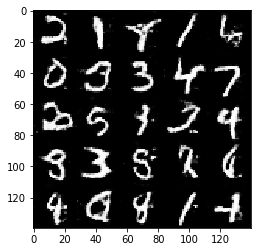

Epoch 2/2... Discriminator Loss: 1.4679... Generator Loss: 0.4623
Epoch 2/2... Discriminator Loss: 1.5876... Generator Loss: 0.3817
Epoch 2/2... Discriminator Loss: 1.5760... Generator Loss: 0.4186
Epoch 2/2... Discriminator Loss: 1.8519... Generator Loss: 0.2737
Epoch 2/2... Discriminator Loss: 1.3204... Generator Loss: 0.8376
Epoch 2/2... Discriminator Loss: 1.4896... Generator Loss: 1.5402
Epoch 2/2... Discriminator Loss: 1.2195... Generator Loss: 0.9898


In [12]:
batch_size = 64
z_dim = 130
learning_rate = 0.0005
beta1 = 0.25

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 4.3970... Generator Loss: 0.0943
Epoch 1/1... Discriminator Loss: 4.1036... Generator Loss: 0.0367
Epoch 1/1... Discriminator Loss: 3.4455... Generator Loss: 0.0830
Epoch 1/1... Discriminator Loss: 2.9161... Generator Loss: 0.1287
Epoch 1/1... Discriminator Loss: 1.7287... Generator Loss: 0.5345
Epoch 1/1... Discriminator Loss: 1.5572... Generator Loss: 0.7139
Epoch 1/1... Discriminator Loss: 0.9332... Generator Loss: 1.1666
Epoch 1/1... Discriminator Loss: 2.1480... Generator Loss: 0.5016
Epoch 1/1... Discriminator Loss: 1.9203... Generator Loss: 0.6606
Epoch 1/1... Discriminator Loss: 1.8185... Generator Loss: 0.6497


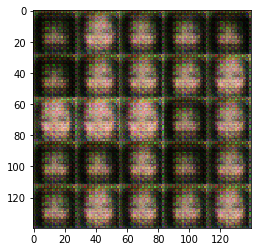

Epoch 1/1... Discriminator Loss: 1.9045... Generator Loss: 0.7252
Epoch 1/1... Discriminator Loss: 1.3931... Generator Loss: 0.9264
Epoch 1/1... Discriminator Loss: 2.0799... Generator Loss: 0.4536
Epoch 1/1... Discriminator Loss: 1.3018... Generator Loss: 0.8708
Epoch 1/1... Discriminator Loss: 1.4069... Generator Loss: 0.8472
Epoch 1/1... Discriminator Loss: 1.7537... Generator Loss: 0.5762
Epoch 1/1... Discriminator Loss: 1.3789... Generator Loss: 0.8967
Epoch 1/1... Discriminator Loss: 1.2972... Generator Loss: 0.9002
Epoch 1/1... Discriminator Loss: 1.7484... Generator Loss: 0.6287
Epoch 1/1... Discriminator Loss: 1.8071... Generator Loss: 0.5253


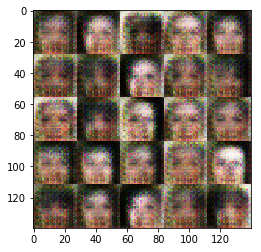

Epoch 1/1... Discriminator Loss: 1.6011... Generator Loss: 0.7091
Epoch 1/1... Discriminator Loss: 1.5488... Generator Loss: 0.7513
Epoch 1/1... Discriminator Loss: 1.5403... Generator Loss: 0.6485
Epoch 1/1... Discriminator Loss: 1.5434... Generator Loss: 0.6830
Epoch 1/1... Discriminator Loss: 1.4936... Generator Loss: 0.6959
Epoch 1/1... Discriminator Loss: 1.4987... Generator Loss: 0.7407
Epoch 1/1... Discriminator Loss: 1.6407... Generator Loss: 0.6145
Epoch 1/1... Discriminator Loss: 1.6511... Generator Loss: 0.6271
Epoch 1/1... Discriminator Loss: 1.5182... Generator Loss: 0.7431
Epoch 1/1... Discriminator Loss: 1.5578... Generator Loss: 0.6922


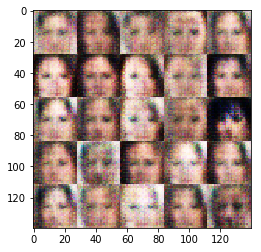

Epoch 1/1... Discriminator Loss: 1.4674... Generator Loss: 0.7416
Epoch 1/1... Discriminator Loss: 1.5133... Generator Loss: 0.7454
Epoch 1/1... Discriminator Loss: 1.4593... Generator Loss: 0.6205
Epoch 1/1... Discriminator Loss: 1.4777... Generator Loss: 0.8007
Epoch 1/1... Discriminator Loss: 1.4057... Generator Loss: 0.7208
Epoch 1/1... Discriminator Loss: 1.4677... Generator Loss: 0.6985
Epoch 1/1... Discriminator Loss: 1.4813... Generator Loss: 0.7693
Epoch 1/1... Discriminator Loss: 1.4627... Generator Loss: 0.8481
Epoch 1/1... Discriminator Loss: 1.4303... Generator Loss: 0.7727
Epoch 1/1... Discriminator Loss: 1.4526... Generator Loss: 0.7299


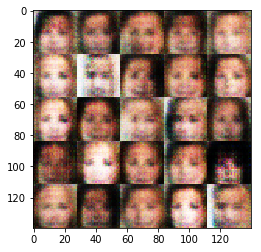

Epoch 1/1... Discriminator Loss: 1.4864... Generator Loss: 0.7032
Epoch 1/1... Discriminator Loss: 1.4576... Generator Loss: 0.6832
Epoch 1/1... Discriminator Loss: 1.4255... Generator Loss: 0.7892
Epoch 1/1... Discriminator Loss: 1.4605... Generator Loss: 0.7236
Epoch 1/1... Discriminator Loss: 1.4385... Generator Loss: 0.7463
Epoch 1/1... Discriminator Loss: 1.4282... Generator Loss: 0.8108
Epoch 1/1... Discriminator Loss: 1.4770... Generator Loss: 0.7581
Epoch 1/1... Discriminator Loss: 1.4611... Generator Loss: 0.7235
Epoch 1/1... Discriminator Loss: 1.4797... Generator Loss: 0.7941
Epoch 1/1... Discriminator Loss: 1.4670... Generator Loss: 0.6729


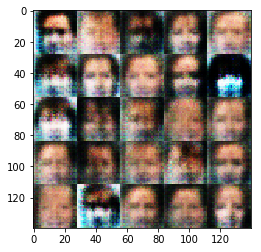

Epoch 1/1... Discriminator Loss: 1.4430... Generator Loss: 0.7755
Epoch 1/1... Discriminator Loss: 1.4554... Generator Loss: 0.7363
Epoch 1/1... Discriminator Loss: 1.4469... Generator Loss: 0.7693
Epoch 1/1... Discriminator Loss: 1.4571... Generator Loss: 0.6644
Epoch 1/1... Discriminator Loss: 1.4165... Generator Loss: 0.7411
Epoch 1/1... Discriminator Loss: 1.4353... Generator Loss: 0.7074
Epoch 1/1... Discriminator Loss: 1.4789... Generator Loss: 0.7372
Epoch 1/1... Discriminator Loss: 1.4914... Generator Loss: 0.6589
Epoch 1/1... Discriminator Loss: 1.4054... Generator Loss: 0.7414
Epoch 1/1... Discriminator Loss: 1.4541... Generator Loss: 0.7677


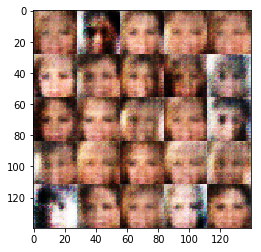

Epoch 1/1... Discriminator Loss: 1.4079... Generator Loss: 0.8070
Epoch 1/1... Discriminator Loss: 1.4035... Generator Loss: 0.7542
Epoch 1/1... Discriminator Loss: 1.4094... Generator Loss: 0.7874
Epoch 1/1... Discriminator Loss: 1.4578... Generator Loss: 0.7684
Epoch 1/1... Discriminator Loss: 1.4820... Generator Loss: 0.6742
Epoch 1/1... Discriminator Loss: 1.4495... Generator Loss: 0.7665
Epoch 1/1... Discriminator Loss: 1.4459... Generator Loss: 0.7251
Epoch 1/1... Discriminator Loss: 1.4060... Generator Loss: 0.7640
Epoch 1/1... Discriminator Loss: 1.4172... Generator Loss: 0.7630
Epoch 1/1... Discriminator Loss: 1.4111... Generator Loss: 0.7489


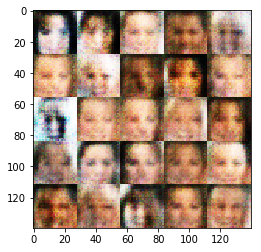

Epoch 1/1... Discriminator Loss: 1.4748... Generator Loss: 0.7438
Epoch 1/1... Discriminator Loss: 1.4637... Generator Loss: 0.7237
Epoch 1/1... Discriminator Loss: 1.4331... Generator Loss: 0.6969
Epoch 1/1... Discriminator Loss: 1.4656... Generator Loss: 0.6904
Epoch 1/1... Discriminator Loss: 1.4257... Generator Loss: 0.8560
Epoch 1/1... Discriminator Loss: 1.4308... Generator Loss: 0.7328
Epoch 1/1... Discriminator Loss: 1.4651... Generator Loss: 0.7405
Epoch 1/1... Discriminator Loss: 1.4197... Generator Loss: 0.7450
Epoch 1/1... Discriminator Loss: 1.4068... Generator Loss: 0.7012
Epoch 1/1... Discriminator Loss: 1.4489... Generator Loss: 0.7495


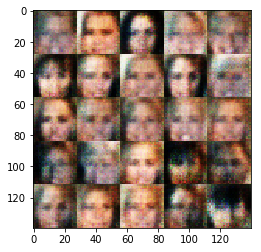

Epoch 1/1... Discriminator Loss: 1.4674... Generator Loss: 0.7149
Epoch 1/1... Discriminator Loss: 1.4399... Generator Loss: 0.6826
Epoch 1/1... Discriminator Loss: 1.4418... Generator Loss: 0.6571
Epoch 1/1... Discriminator Loss: 1.4704... Generator Loss: 0.8466
Epoch 1/1... Discriminator Loss: 1.4516... Generator Loss: 0.8559
Epoch 1/1... Discriminator Loss: 1.4378... Generator Loss: 0.7745
Epoch 1/1... Discriminator Loss: 1.4323... Generator Loss: 0.7434
Epoch 1/1... Discriminator Loss: 1.4037... Generator Loss: 0.7380
Epoch 1/1... Discriminator Loss: 1.4376... Generator Loss: 0.7871
Epoch 1/1... Discriminator Loss: 1.3882... Generator Loss: 0.7782


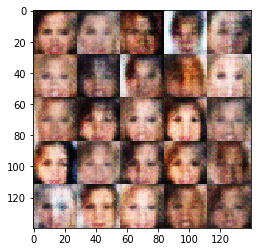

Epoch 1/1... Discriminator Loss: 1.3881... Generator Loss: 0.7216
Epoch 1/1... Discriminator Loss: 1.4314... Generator Loss: 0.6850
Epoch 1/1... Discriminator Loss: 1.4320... Generator Loss: 0.7399
Epoch 1/1... Discriminator Loss: 1.4198... Generator Loss: 0.7455
Epoch 1/1... Discriminator Loss: 1.4166... Generator Loss: 0.7111
Epoch 1/1... Discriminator Loss: 1.4370... Generator Loss: 0.7688
Epoch 1/1... Discriminator Loss: 1.4052... Generator Loss: 0.7066
Epoch 1/1... Discriminator Loss: 1.3917... Generator Loss: 0.8327
Epoch 1/1... Discriminator Loss: 1.4307... Generator Loss: 0.7490
Epoch 1/1... Discriminator Loss: 1.4101... Generator Loss: 0.7125


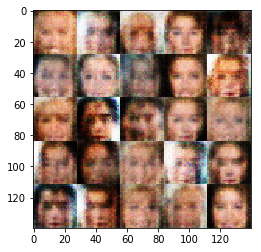

Epoch 1/1... Discriminator Loss: 1.4155... Generator Loss: 0.7570
Epoch 1/1... Discriminator Loss: 1.4677... Generator Loss: 0.7178
Epoch 1/1... Discriminator Loss: 1.4469... Generator Loss: 0.6511
Epoch 1/1... Discriminator Loss: 1.4152... Generator Loss: 0.7998
Epoch 1/1... Discriminator Loss: 1.4330... Generator Loss: 0.6998
Epoch 1/1... Discriminator Loss: 1.4068... Generator Loss: 0.7583
Epoch 1/1... Discriminator Loss: 1.4145... Generator Loss: 0.7127
Epoch 1/1... Discriminator Loss: 1.4023... Generator Loss: 0.8185
Epoch 1/1... Discriminator Loss: 1.4082... Generator Loss: 0.7327
Epoch 1/1... Discriminator Loss: 1.3717... Generator Loss: 0.7319


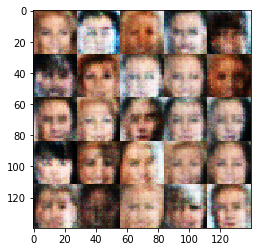

Epoch 1/1... Discriminator Loss: 1.4354... Generator Loss: 0.7735
Epoch 1/1... Discriminator Loss: 1.3997... Generator Loss: 0.7699
Epoch 1/1... Discriminator Loss: 1.4542... Generator Loss: 0.7286
Epoch 1/1... Discriminator Loss: 1.3801... Generator Loss: 0.8152
Epoch 1/1... Discriminator Loss: 1.3947... Generator Loss: 0.7960
Epoch 1/1... Discriminator Loss: 1.4285... Generator Loss: 0.7828
Epoch 1/1... Discriminator Loss: 1.3813... Generator Loss: 0.7654
Epoch 1/1... Discriminator Loss: 1.4310... Generator Loss: 0.7871
Epoch 1/1... Discriminator Loss: 1.4367... Generator Loss: 0.7232
Epoch 1/1... Discriminator Loss: 1.4369... Generator Loss: 0.7510


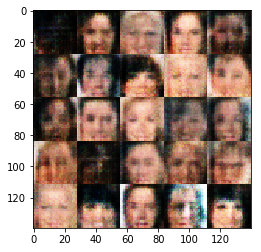

Epoch 1/1... Discriminator Loss: 1.4187... Generator Loss: 0.6743
Epoch 1/1... Discriminator Loss: 1.4649... Generator Loss: 0.7830
Epoch 1/1... Discriminator Loss: 1.4265... Generator Loss: 0.6935
Epoch 1/1... Discriminator Loss: 1.4178... Generator Loss: 0.7230
Epoch 1/1... Discriminator Loss: 1.4163... Generator Loss: 0.6932
Epoch 1/1... Discriminator Loss: 1.4119... Generator Loss: 0.8098
Epoch 1/1... Discriminator Loss: 1.3987... Generator Loss: 0.7872
Epoch 1/1... Discriminator Loss: 1.4560... Generator Loss: 0.6792
Epoch 1/1... Discriminator Loss: 1.3981... Generator Loss: 0.7086
Epoch 1/1... Discriminator Loss: 1.4421... Generator Loss: 0.7734


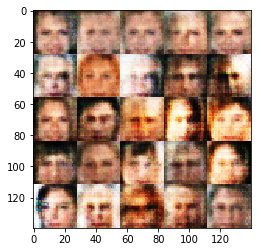

Epoch 1/1... Discriminator Loss: 1.4469... Generator Loss: 0.7779
Epoch 1/1... Discriminator Loss: 1.4192... Generator Loss: 0.7538
Epoch 1/1... Discriminator Loss: 1.4052... Generator Loss: 0.7933
Epoch 1/1... Discriminator Loss: 1.4117... Generator Loss: 0.7102
Epoch 1/1... Discriminator Loss: 1.4036... Generator Loss: 0.7515
Epoch 1/1... Discriminator Loss: 1.4201... Generator Loss: 0.7868
Epoch 1/1... Discriminator Loss: 1.4245... Generator Loss: 0.8500
Epoch 1/1... Discriminator Loss: 1.4390... Generator Loss: 0.7621
Epoch 1/1... Discriminator Loss: 1.4239... Generator Loss: 0.7930
Epoch 1/1... Discriminator Loss: 1.4065... Generator Loss: 0.7962


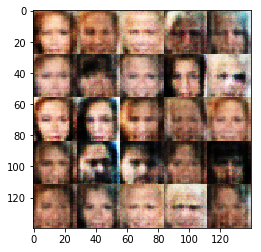

Epoch 1/1... Discriminator Loss: 1.4356... Generator Loss: 0.7249
Epoch 1/1... Discriminator Loss: 1.4371... Generator Loss: 0.8452
Epoch 1/1... Discriminator Loss: 1.4166... Generator Loss: 0.7480
Epoch 1/1... Discriminator Loss: 1.3834... Generator Loss: 0.8262
Epoch 1/1... Discriminator Loss: 1.3709... Generator Loss: 0.7522
Epoch 1/1... Discriminator Loss: 1.3994... Generator Loss: 0.7599
Epoch 1/1... Discriminator Loss: 1.4241... Generator Loss: 0.8003
Epoch 1/1... Discriminator Loss: 1.4924... Generator Loss: 0.7694
Epoch 1/1... Discriminator Loss: 1.3964... Generator Loss: 0.8097
Epoch 1/1... Discriminator Loss: 1.3854... Generator Loss: 0.7385


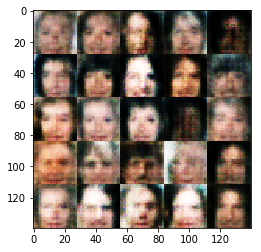

Epoch 1/1... Discriminator Loss: 1.3872... Generator Loss: 0.7928
Epoch 1/1... Discriminator Loss: 1.3826... Generator Loss: 0.7669
Epoch 1/1... Discriminator Loss: 1.4402... Generator Loss: 0.7471
Epoch 1/1... Discriminator Loss: 1.4144... Generator Loss: 0.7738
Epoch 1/1... Discriminator Loss: 1.3857... Generator Loss: 0.8765
Epoch 1/1... Discriminator Loss: 1.4162... Generator Loss: 0.7238
Epoch 1/1... Discriminator Loss: 1.4165... Generator Loss: 0.8424
Epoch 1/1... Discriminator Loss: 1.3766... Generator Loss: 0.7671
Epoch 1/1... Discriminator Loss: 1.4088... Generator Loss: 0.7388
Epoch 1/1... Discriminator Loss: 1.4150... Generator Loss: 0.7764


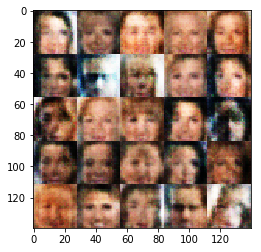

Epoch 1/1... Discriminator Loss: 1.4126... Generator Loss: 0.7959
Epoch 1/1... Discriminator Loss: 1.4269... Generator Loss: 0.7701
Epoch 1/1... Discriminator Loss: 1.3875... Generator Loss: 0.7581
Epoch 1/1... Discriminator Loss: 1.4146... Generator Loss: 0.7371
Epoch 1/1... Discriminator Loss: 1.4399... Generator Loss: 0.7729
Epoch 1/1... Discriminator Loss: 1.4135... Generator Loss: 0.7329
Epoch 1/1... Discriminator Loss: 1.4177... Generator Loss: 0.8450
Epoch 1/1... Discriminator Loss: 1.4218... Generator Loss: 0.7941
Epoch 1/1... Discriminator Loss: 1.4172... Generator Loss: 0.8450
Epoch 1/1... Discriminator Loss: 1.4508... Generator Loss: 0.6879


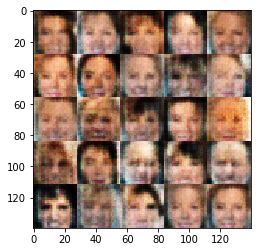

Epoch 1/1... Discriminator Loss: 1.4260... Generator Loss: 0.6758
Epoch 1/1... Discriminator Loss: 1.4385... Generator Loss: 0.7293
Epoch 1/1... Discriminator Loss: 1.4454... Generator Loss: 0.6631
Epoch 1/1... Discriminator Loss: 1.4287... Generator Loss: 0.7872
Epoch 1/1... Discriminator Loss: 1.4510... Generator Loss: 0.6734
Epoch 1/1... Discriminator Loss: 1.4448... Generator Loss: 0.7729
Epoch 1/1... Discriminator Loss: 1.3687... Generator Loss: 0.7663
Epoch 1/1... Discriminator Loss: 1.4211... Generator Loss: 0.7727
Epoch 1/1... Discriminator Loss: 1.4094... Generator Loss: 0.6962
Epoch 1/1... Discriminator Loss: 1.4107... Generator Loss: 0.7479


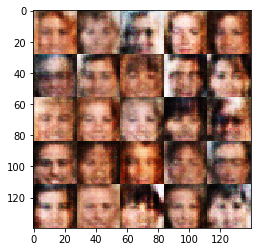

Epoch 1/1... Discriminator Loss: 1.4637... Generator Loss: 0.7206
Epoch 1/1... Discriminator Loss: 1.4196... Generator Loss: 0.7827
Epoch 1/1... Discriminator Loss: 1.4335... Generator Loss: 0.7011
Epoch 1/1... Discriminator Loss: 1.3930... Generator Loss: 0.7448
Epoch 1/1... Discriminator Loss: 1.3963... Generator Loss: 0.7871
Epoch 1/1... Discriminator Loss: 1.4280... Generator Loss: 0.7720
Epoch 1/1... Discriminator Loss: 1.3937... Generator Loss: 0.7508
Epoch 1/1... Discriminator Loss: 1.4141... Generator Loss: 0.7264
Epoch 1/1... Discriminator Loss: 1.3667... Generator Loss: 0.8317
Epoch 1/1... Discriminator Loss: 1.4177... Generator Loss: 0.7493


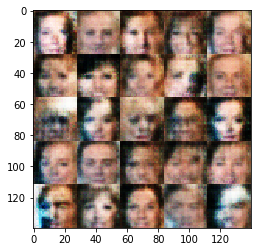

Epoch 1/1... Discriminator Loss: 1.4530... Generator Loss: 0.7368
Epoch 1/1... Discriminator Loss: 1.3650... Generator Loss: 0.8483
Epoch 1/1... Discriminator Loss: 1.4282... Generator Loss: 0.7014
Epoch 1/1... Discriminator Loss: 1.3948... Generator Loss: 0.7835
Epoch 1/1... Discriminator Loss: 1.4491... Generator Loss: 0.7336
Epoch 1/1... Discriminator Loss: 1.4024... Generator Loss: 0.8007
Epoch 1/1... Discriminator Loss: 1.3840... Generator Loss: 0.7992
Epoch 1/1... Discriminator Loss: 1.4113... Generator Loss: 0.7581
Epoch 1/1... Discriminator Loss: 1.4218... Generator Loss: 0.8297
Epoch 1/1... Discriminator Loss: 1.3854... Generator Loss: 0.7790


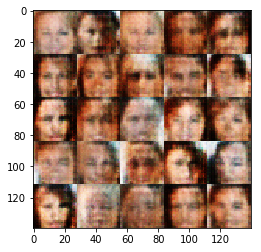

Epoch 1/1... Discriminator Loss: 1.4407... Generator Loss: 0.7212
Epoch 1/1... Discriminator Loss: 1.4184... Generator Loss: 0.8302
Epoch 1/1... Discriminator Loss: 1.4064... Generator Loss: 0.7933
Epoch 1/1... Discriminator Loss: 1.4142... Generator Loss: 0.7900
Epoch 1/1... Discriminator Loss: 1.3975... Generator Loss: 0.7979
Epoch 1/1... Discriminator Loss: 1.3850... Generator Loss: 0.7702
Epoch 1/1... Discriminator Loss: 1.4241... Generator Loss: 0.7692
Epoch 1/1... Discriminator Loss: 1.4108... Generator Loss: 0.8279
Epoch 1/1... Discriminator Loss: 1.4381... Generator Loss: 0.8265
Epoch 1/1... Discriminator Loss: 1.3922... Generator Loss: 0.7271


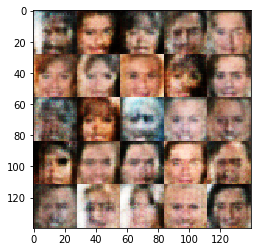

Epoch 1/1... Discriminator Loss: 1.4345... Generator Loss: 0.8224
Epoch 1/1... Discriminator Loss: 1.4031... Generator Loss: 0.7610
Epoch 1/1... Discriminator Loss: 1.4208... Generator Loss: 0.7573
Epoch 1/1... Discriminator Loss: 1.3879... Generator Loss: 0.8222
Epoch 1/1... Discriminator Loss: 1.4235... Generator Loss: 0.7853
Epoch 1/1... Discriminator Loss: 1.3813... Generator Loss: 0.7988
Epoch 1/1... Discriminator Loss: 1.4222... Generator Loss: 0.7996
Epoch 1/1... Discriminator Loss: 1.4091... Generator Loss: 0.7193
Epoch 1/1... Discriminator Loss: 1.4067... Generator Loss: 0.7339
Epoch 1/1... Discriminator Loss: 1.4269... Generator Loss: 0.7719


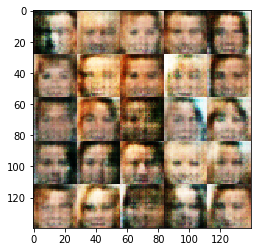

Epoch 1/1... Discriminator Loss: 1.3744... Generator Loss: 0.7729
Epoch 1/1... Discriminator Loss: 1.5012... Generator Loss: 0.7250
Epoch 1/1... Discriminator Loss: 1.4324... Generator Loss: 0.7489
Epoch 1/1... Discriminator Loss: 1.3878... Generator Loss: 0.7807
Epoch 1/1... Discriminator Loss: 1.4100... Generator Loss: 0.7066
Epoch 1/1... Discriminator Loss: 1.4359... Generator Loss: 0.7390
Epoch 1/1... Discriminator Loss: 1.4199... Generator Loss: 0.7782
Epoch 1/1... Discriminator Loss: 1.4075... Generator Loss: 0.8449
Epoch 1/1... Discriminator Loss: 1.4193... Generator Loss: 0.8175
Epoch 1/1... Discriminator Loss: 1.4193... Generator Loss: 0.8125


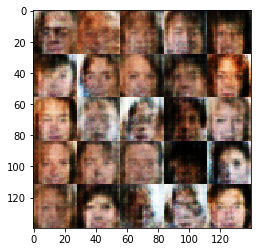

Epoch 1/1... Discriminator Loss: 1.4170... Generator Loss: 0.6813
Epoch 1/1... Discriminator Loss: 1.3824... Generator Loss: 0.8037
Epoch 1/1... Discriminator Loss: 1.4307... Generator Loss: 0.7613
Epoch 1/1... Discriminator Loss: 1.3716... Generator Loss: 0.8111
Epoch 1/1... Discriminator Loss: 1.4314... Generator Loss: 0.6927
Epoch 1/1... Discriminator Loss: 1.4095... Generator Loss: 0.8302
Epoch 1/1... Discriminator Loss: 1.4153... Generator Loss: 0.7675
Epoch 1/1... Discriminator Loss: 1.3931... Generator Loss: 0.8002
Epoch 1/1... Discriminator Loss: 1.4006... Generator Loss: 0.8198
Epoch 1/1... Discriminator Loss: 1.4102... Generator Loss: 0.7791


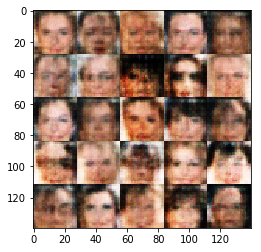

Epoch 1/1... Discriminator Loss: 1.3995... Generator Loss: 0.7829
Epoch 1/1... Discriminator Loss: 1.4086... Generator Loss: 0.7556
Epoch 1/1... Discriminator Loss: 1.4143... Generator Loss: 0.7414
Epoch 1/1... Discriminator Loss: 1.4103... Generator Loss: 0.7338
Epoch 1/1... Discriminator Loss: 1.4003... Generator Loss: 0.7338
Epoch 1/1... Discriminator Loss: 1.4149... Generator Loss: 0.6594
Epoch 1/1... Discriminator Loss: 1.4180... Generator Loss: 0.7206
Epoch 1/1... Discriminator Loss: 1.4223... Generator Loss: 0.6919
Epoch 1/1... Discriminator Loss: 1.4192... Generator Loss: 0.7078
Epoch 1/1... Discriminator Loss: 1.3877... Generator Loss: 0.8148


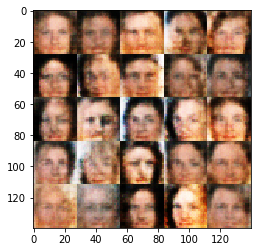

Epoch 1/1... Discriminator Loss: 1.4295... Generator Loss: 0.8163
Epoch 1/1... Discriminator Loss: 1.4121... Generator Loss: 0.7962
Epoch 1/1... Discriminator Loss: 1.3741... Generator Loss: 0.7980
Epoch 1/1... Discriminator Loss: 1.3973... Generator Loss: 0.8022
Epoch 1/1... Discriminator Loss: 1.3819... Generator Loss: 0.7755
Epoch 1/1... Discriminator Loss: 1.4017... Generator Loss: 0.8506
Epoch 1/1... Discriminator Loss: 1.3885... Generator Loss: 0.8083
Epoch 1/1... Discriminator Loss: 1.4294... Generator Loss: 0.8196
Epoch 1/1... Discriminator Loss: 1.4226... Generator Loss: 0.7606
Epoch 1/1... Discriminator Loss: 1.3805... Generator Loss: 0.8067


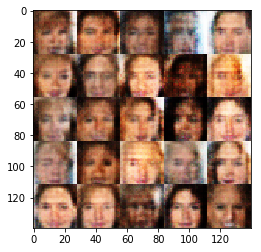

Epoch 1/1... Discriminator Loss: 1.3895... Generator Loss: 0.7264
Epoch 1/1... Discriminator Loss: 1.4176... Generator Loss: 0.7306
Epoch 1/1... Discriminator Loss: 1.4119... Generator Loss: 0.7423
Epoch 1/1... Discriminator Loss: 1.3753... Generator Loss: 0.8008
Epoch 1/1... Discriminator Loss: 1.3823... Generator Loss: 0.8227
Epoch 1/1... Discriminator Loss: 1.4037... Generator Loss: 0.8178
Epoch 1/1... Discriminator Loss: 1.3779... Generator Loss: 0.7585
Epoch 1/1... Discriminator Loss: 1.3988... Generator Loss: 0.8579
Epoch 1/1... Discriminator Loss: 1.4071... Generator Loss: 0.7823
Epoch 1/1... Discriminator Loss: 1.4113... Generator Loss: 0.7188


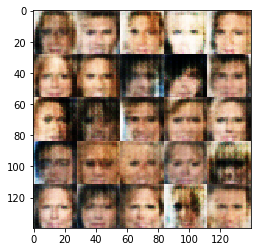

Epoch 1/1... Discriminator Loss: 1.4170... Generator Loss: 0.7933
Epoch 1/1... Discriminator Loss: 1.3882... Generator Loss: 0.7688
Epoch 1/1... Discriminator Loss: 1.3870... Generator Loss: 0.7611
Epoch 1/1... Discriminator Loss: 1.4460... Generator Loss: 0.7418
Epoch 1/1... Discriminator Loss: 1.3941... Generator Loss: 0.8455
Epoch 1/1... Discriminator Loss: 1.4184... Generator Loss: 0.8288
Epoch 1/1... Discriminator Loss: 1.4346... Generator Loss: 0.7889
Epoch 1/1... Discriminator Loss: 1.3800... Generator Loss: 0.7592
Epoch 1/1... Discriminator Loss: 1.4264... Generator Loss: 0.7992
Epoch 1/1... Discriminator Loss: 1.4181... Generator Loss: 0.6659


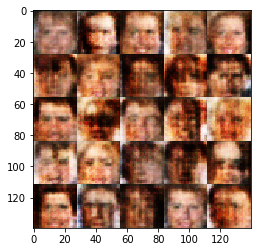

Epoch 1/1... Discriminator Loss: 1.4228... Generator Loss: 0.7463
Epoch 1/1... Discriminator Loss: 1.4220... Generator Loss: 0.7548
Epoch 1/1... Discriminator Loss: 1.4057... Generator Loss: 0.7211
Epoch 1/1... Discriminator Loss: 1.4261... Generator Loss: 0.7561
Epoch 1/1... Discriminator Loss: 1.4175... Generator Loss: 0.7464
Epoch 1/1... Discriminator Loss: 1.3784... Generator Loss: 0.7987
Epoch 1/1... Discriminator Loss: 1.4658... Generator Loss: 0.7836
Epoch 1/1... Discriminator Loss: 1.4206... Generator Loss: 0.7252
Epoch 1/1... Discriminator Loss: 1.3863... Generator Loss: 0.7701
Epoch 1/1... Discriminator Loss: 1.3974... Generator Loss: 0.7449


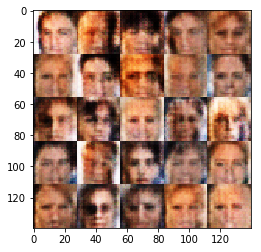

Epoch 1/1... Discriminator Loss: 1.4519... Generator Loss: 0.7495
Epoch 1/1... Discriminator Loss: 1.4018... Generator Loss: 0.8548
Epoch 1/1... Discriminator Loss: 1.4009... Generator Loss: 0.7571
Epoch 1/1... Discriminator Loss: 1.3947... Generator Loss: 0.8594
Epoch 1/1... Discriminator Loss: 1.3956... Generator Loss: 0.8502
Epoch 1/1... Discriminator Loss: 1.4050... Generator Loss: 0.8072
Epoch 1/1... Discriminator Loss: 1.4114... Generator Loss: 0.7770
Epoch 1/1... Discriminator Loss: 1.3938... Generator Loss: 0.7703
Epoch 1/1... Discriminator Loss: 1.3929... Generator Loss: 0.8025
Epoch 1/1... Discriminator Loss: 1.3924... Generator Loss: 0.8433


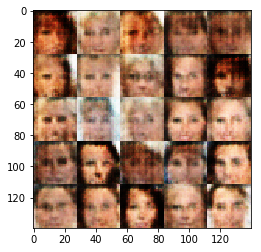

Epoch 1/1... Discriminator Loss: 1.3729... Generator Loss: 0.7216
Epoch 1/1... Discriminator Loss: 1.4091... Generator Loss: 0.7544
Epoch 1/1... Discriminator Loss: 1.3958... Generator Loss: 0.7785
Epoch 1/1... Discriminator Loss: 1.4242... Generator Loss: 0.7772
Epoch 1/1... Discriminator Loss: 1.4468... Generator Loss: 0.7519
Epoch 1/1... Discriminator Loss: 1.3967... Generator Loss: 0.7941
Epoch 1/1... Discriminator Loss: 1.3929... Generator Loss: 0.7961
Epoch 1/1... Discriminator Loss: 1.4414... Generator Loss: 0.8521
Epoch 1/1... Discriminator Loss: 1.4162... Generator Loss: 0.7960
Epoch 1/1... Discriminator Loss: 1.3985... Generator Loss: 0.7939


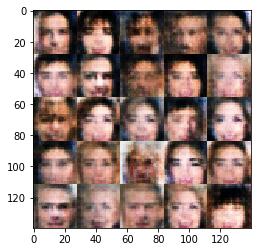

Epoch 1/1... Discriminator Loss: 1.3816... Generator Loss: 0.7755
Epoch 1/1... Discriminator Loss: 1.4101... Generator Loss: 0.8828
Epoch 1/1... Discriminator Loss: 1.4239... Generator Loss: 0.7071
Epoch 1/1... Discriminator Loss: 1.3850... Generator Loss: 0.8712
Epoch 1/1... Discriminator Loss: 1.4058... Generator Loss: 0.7441
Epoch 1/1... Discriminator Loss: 1.3972... Generator Loss: 0.8200


In [13]:
batch_size = 64
z_dim = 100
learning_rate = 0.0003
beta1 = 0.3


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.